<a href="https://colab.research.google.com/github/mrreyesm/FINANCIAL_ASSET_ANALYSIS/blob/main/FINANCIAL_ASSET_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##FINANCIAL ASSET ANALYSIS

# Libraries

In [144]:
#Importing Librarys 
# For system related operations
import sys
# For saving access tokens and for file mngmnt when creating and adding to the dataset
import os
# For Data Processing
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# For reading stock data
import pandas_datareader as pdr
# For time stamps
from datetime import datetime
from dateutil.tz import gettz
import time
# For sending GET requests from the API
import requests
# For dealing with json responses we receive from the API
import json
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
# For natural language processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words_n = nltk.corpus.stopwords.words('english')
from nltk import word_tokenize
# For string manipulation
import string
# To create a word cloud with tweets
from wordcloud import WordCloud
# For yahoo finance
!{sys.executable} -m pip install yfinance
import yfinance as yf
# For long strings
import textwrap

#Global variables
stock = "V"
# API key
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAKwsZwEAAAAARfPLFsHkhgzkATLhA4UJzvVEugQ%3DL3goAkl3kgtVBWw619JvpHPVGFJsOwetuedpvlozXPaaelGFTt'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# ANALYZING DATA SOURCES

## Tiingo API (just for testing but might get deleted, notrelevant info and wrong)

In [102]:
# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-14,end.month,end.day)

# Create Dataframe of one Stock as an example
#API-Token: zcktkuu3fztsuu1e9xgh1t
VISA = pdr.get_data_tiingo("V",start,end, api_key="969ff33a7bbebc006aeb1da0f0fa6f5471e2c1c6")
# Data Prep
VISA = VISA.reset_index()
VISA = VISA.drop(columns="symbol")
VISA["date"] = pd.to_datetime(VISA["date"]).dt.strftime("%Y-%m-%d")
VISA.set_index('date', inplace=True)
VISA.head(2)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2008-05-13,82.38,83.50,80.79,81.75,13312400,18.637216,18.890598,18.277502,18.494688,53249600,0.0,1.0
2008-05-14,82.23,84.35,81.45,83.34,12850100,18.603280,19.082898,18.426817,18.854401,51400400,0.0,1.0


Text(0.5, 0, 'Date')

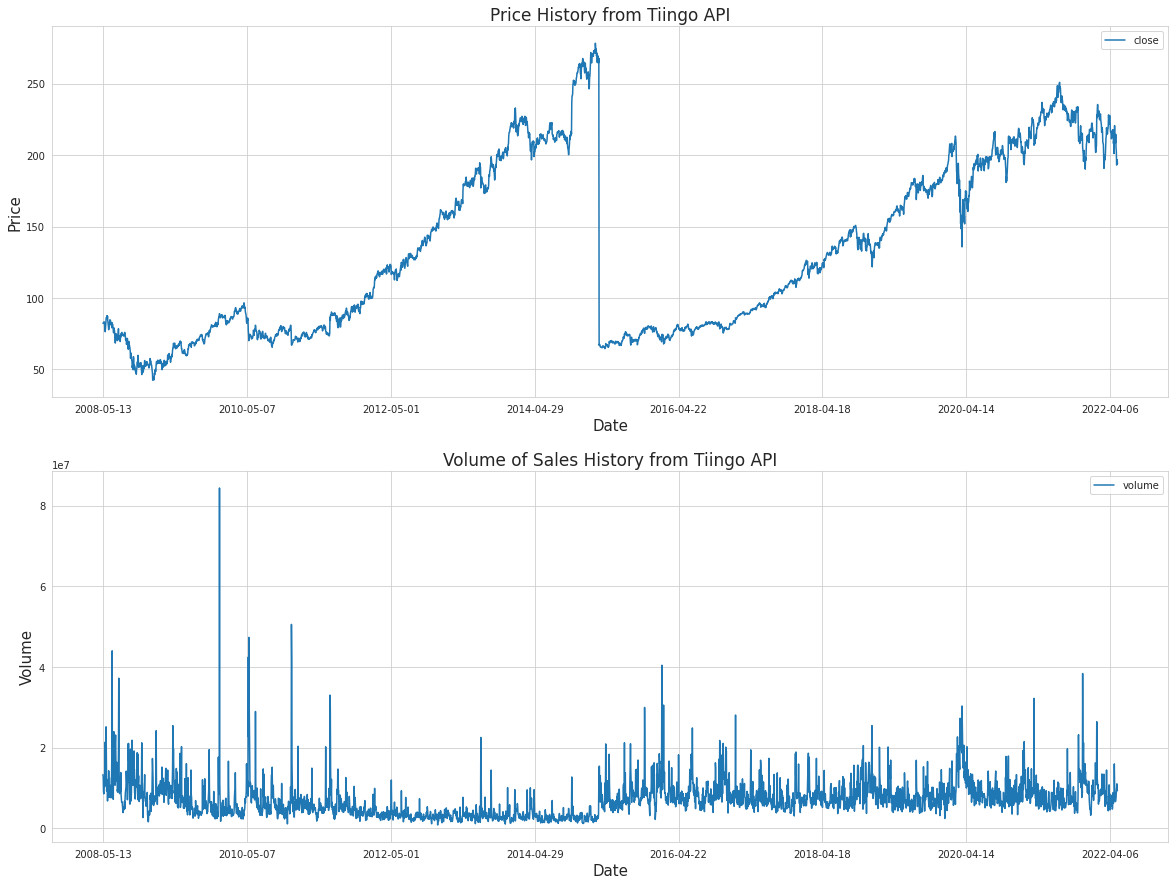

In [103]:
# Let's see a historical view of the closing price
plt.rcParams['figure.figsize'] = (20,15)
plt.subplot(2, 1, 1)
VISA['close'].plot(legend=True)
plt.title('Price History from Tiingo API',fontsize=17)
plt.ylabel('Price', fontsize=15)
plt.xlabel('Date', fontsize=15)
# Now let's plot the total volume of stock being traded each day
plt.subplot(2, 1, 2)
VISA['volume'].plot(legend=True)
plt.title('Volume of Sales History from Tiingo API',fontsize=17)
plt.ylabel('Volume', fontsize=15)
plt.xlabel('Date', fontsize=15)

## Bloomber Terminal (Won't work without the .txt file) Comment or eliminate to continue

### Import information from bloomberg
Visa = pd.read_csv('visa.txt', sep = "\t")
Visa["Date"] = pd.to_datetime(Visa["Date"]).dt.strftime("%Y-%m-%d")
Visa.set_index('Date', inplace=True)
Visa.columns = ("Close", "Volume")
Visa = Visa.sort_values(by = "Date")
Visa.head(2)

### Let's see a historical view of the closing price
plt.rcParams['figure.figsize'] = (20,15)
plt.subplot(2, 1, 1)
Visa['Close'].plot(legend=True)
plt.title('Price History from Bloomberg',fontsize=17)
plt.ylabel('Price', fontsize=15)
plt.xlabel('Date', fontsize=15)
### Now let's plot the total volume of stock being traded each day
plt.subplot(2, 1, 2)
Visa['Volume'].plot(legend=True)
plt.title('Volume of Sales History from Bloomberg',fontsize=17)
plt.ylabel('Volume', fontsize=15)
plt.xlabel('Date', fontsize=15)

## Yahoo finance API

In [104]:
symbol = yf.Ticker(stock)
# get historical market data
hist = symbol.history(period="max")
hist.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-03-19,13.483552,15.636388,12.463788,12.803709,708486000,0.0,0.0
2008-03-20,13.234272,14.729926,13.030319,14.582626,198985200,0.0,0.0


Text(0.5, 0, 'Date')

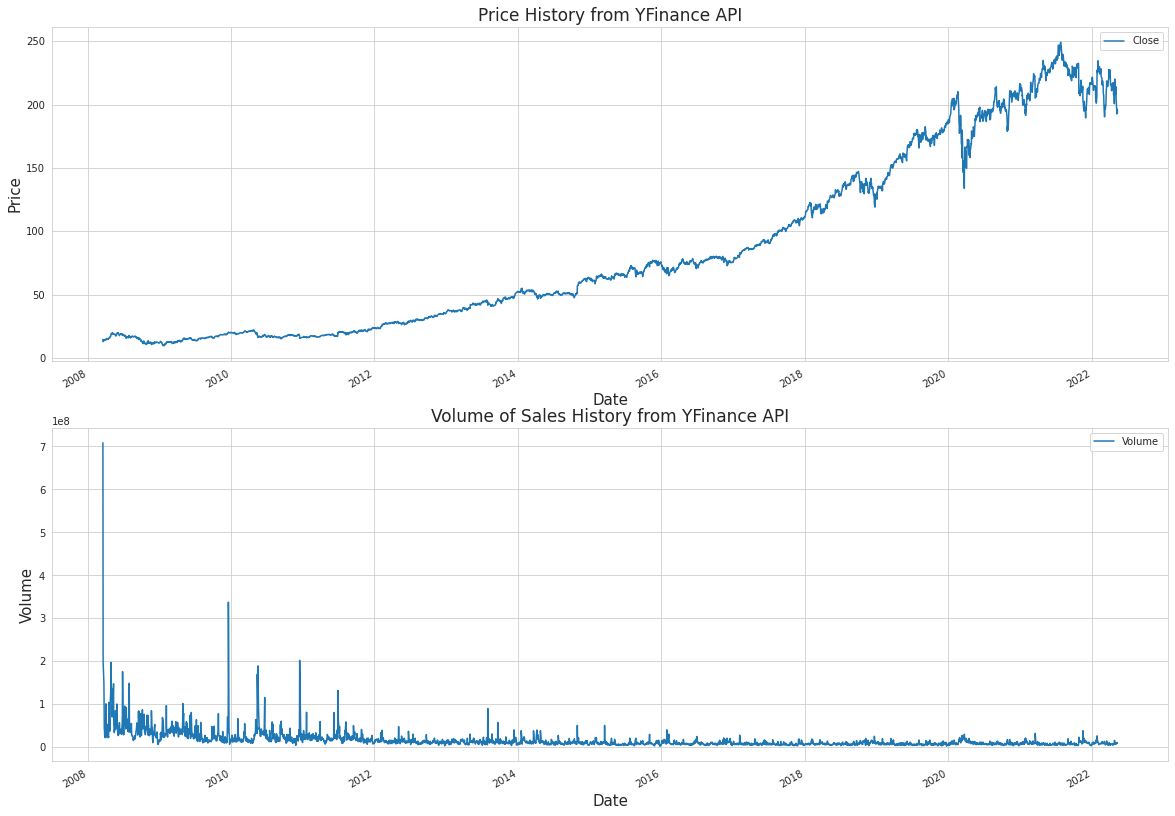

In [137]:
# Let's see a historical view of the closing price
plt.rcParams['figure.figsize'] = (20,15)
plt.subplot(2, 1, 1)
hist['Close'].plot(legend=True)
plt.title('Price History from YFinance API',fontsize=17)
plt.ylabel('Price', fontsize=15)
plt.xlabel('Date', fontsize=15)
# Now let's plot the total volume of stock being traded each day
plt.subplot(2, 1, 2)
hist['Volume'].plot(legend=True)
plt.title('Volume of Sales History from YFinance API',fontsize=17)
plt.ylabel('Volume', fontsize=15)
plt.xlabel('Date', fontsize=15)

## ANALYZING DATA

In [106]:
#Basic info
longName = symbol.info["longName"]
shortName = symbol.info["shortName"]
symb = symbol.info["symbol"]
market = symbol.info["market"]
sector = symbol.info["sector"]
industry= symbol.info["industry"]
longBusinessSummary = symbol.info["longBusinessSummary"]
currentPrice = symbol.info["currentPrice"]
currency = symbol.info["currency"]
#Useful information for calculations
recommendationKey = symbol.info["recommendationKey"]
regularMarketDayHigh = symbol.info["regularMarketDayHigh"]
regularMarketDayLow = symbol.info["regularMarketDayLow"]
regularMarketPreviousClose = symbol.info["regularMarketPreviousClose"]
regularMarketOpen = symbol.info["regularMarketOpen"]
regularMarketPrice = symbol.info["regularMarketPrice"]
regularMarketVolume = symbol.info["regularMarketVolume"]
totalDebt= symbol.info["totalDebt"]
totalRevenue= symbol.info["totalRevenue"]
totalDebt= symbol.info["totalDebt"]
ebitda= symbol.info["ebitda"]
marketCap = symbol.info["marketCap"]
regularMarketPrice = symbol.info["regularMarketPrice"]
freeCashflow = symbol.info["freeCashflow"]
open = symbol.info["open"]
currentPrice = symbol.info["currentPrice"]
dayHigh = symbol.info["dayHigh"]
dayLow = symbol.info["dayLow"]
targetHighPrice = symbol.info["targetHighPrice"]
targetLowPrice = symbol.info["targetLowPrice"]
targetMeanPrice= symbol.info["targetMeanPrice"]
targetMedianPrice = symbol.info["targetMedianPrice"]
#symbol.info

In [107]:
print(f"Name: {longName} Symbol: {symb} Market: {market}")
print(f"Sector: {sector} Industry: {industry}\n\nBusiness description:")
wrapper = textwrap.TextWrapper(width=80)
word_list = wrapper.wrap(text=longBusinessSummary)  
for element in word_list:
    print(element)
print(f"\nCurrent price: {currentPrice} Currency: {currency}")

Name: Visa Inc. Symbol: V Market: us_market
Sector: Financial Services Industry: Credit Services

Business description:
Visa Inc. operates as a payments technology company worldwide. The company
facilitates digital payments among consumers, merchants, financial institutions,
businesses, strategic partners, and government entities. It operates VisaNet, a
transaction processing network that enables authorization, clearing, and
settlement of payment transactions. In addition, the company offers card
products, platforms, and value-added services. It provides its services under
the Visa, Visa Electron, Interlink, VPAY, and PLUS brands. Visa Inc. was founded
in 1958 and is headquartered in San Francisco, California.

Current price: 193.97 Currency: USD


# Sentiment Analysis

### Yahoo Finance News

In [108]:
# Create dataframe with news info
col_names = ['link', 'providerPublishTime', 'title', 'type','uuid']
news_df = pd.DataFrame(columns=col_names)
counter = 0
for news in symbol.news:
  link = news["link"]
  providerPublishTime = news["providerPublishTime"]
  title = news["title"]
  ntype = news["type"]
  uuid = news["uuid"]
# Assemble all data in a list
  res = [link, providerPublishTime, title, ntype, uuid]  
  # Append the result to the CSV file
  counter += 1
  df_length = len(news_df)
  news_df.loc[df_length] = res
# Print the number of tweets for this iteration
print("# of news added: ", counter)
news_df['providerPublishTime'] = news_df['providerPublishTime'].apply(datetime.fromtimestamp)
news_df.head()

# of news added:  8


,link,providerPublishTime,title,type,uuid
0,https://finance.yahoo.com/news/stock-market-re...,2022-05-10 15:26:04,Stock Market Recession 2022: 10 Stocks to Sell...,STORY,7e102a2c-99db-3b57-b76e-08ba7a1ca408
1,https://finance.yahoo.com/m/92cfe3fd-0508-3068...,2022-05-10 09:06:00,Stock Market Plunge: 5 Discounted Growth Stock...,STORY,92cfe3fd-0508-3068-ab10-6e621e822449
2,https://finance.yahoo.com/news/billionaire-ken...,2022-05-09 19:54:22,Billionaire Ken Fisher’s 10 Favorite Tech Stocks,STORY,0221d6d9-71f9-3fb4-b40f-cc24801185e5
3,https://finance.yahoo.com/news/investors-under...,2022-05-09 14:33:02,Are Investors Undervaluing Visa Inc. (NYSE:V) ...,STORY,7d09e996-4b41-3b52-9148-0df6cdbba8a2
4,https://finance.yahoo.com/news/why-visa-v-top-...,2022-05-09 14:20:02,Why Visa (V) is a Top Stock for the Long-Term,STORY,f68765aa-2fdd-38f8-ac4d-8af46b3be0f7


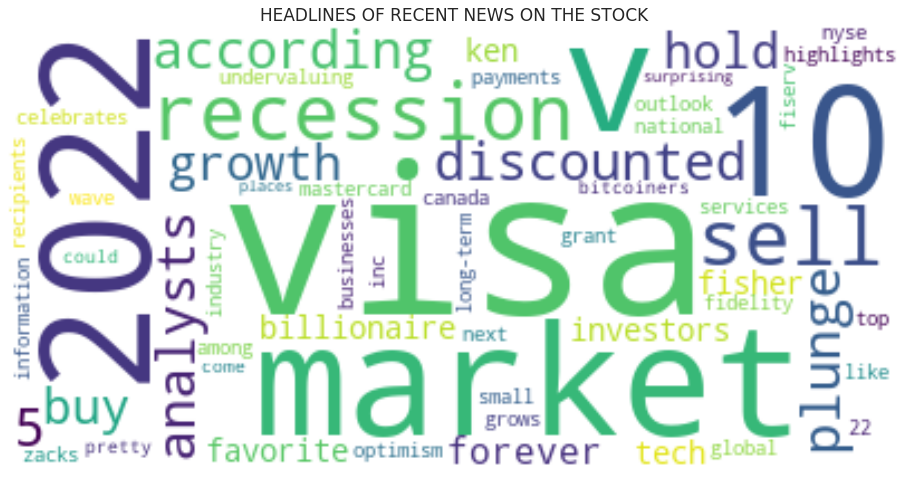

In [117]:
#Pass to list
data = news_df['title'].to_list()
#identify paaterns and create tokens
pattern = r'''(?x)                  # Flag to initiate verbose mode
              (?:[A-Z]\.)+          # get abreviations like U.S.A.
              | \w+(?:-\w+)*        # words with internal -
              | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
              | \.\.\.              # gets ...
              | [][.,;"'?():-_`]    # gets punctuation marks
'''
text = []
for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  text.append(token_2)
flatten = [w for l in text for w in l]
punctuation = list(string.punctuation)
df_2 = [w for w in flatten if w not in stop_words_n]
df_3 = [w for w in df_2 if w not in punctuation]
freq_words = nltk.FreqDist(df_3)
omit_words = ["stock", "stocks"]
df_4 =  [w for w in df_3 if w not in omit_words]
freq_words = nltk.FreqDist(df_4)
plt.rcParams['figure.figsize'] = (16,9)
wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('HEADLINES OF RECENT NEWS ON THE STOCK',fontsize=17)
plt.show()

### Tweets

In [126]:
#some API FUNCTIONS and parameters
def auth():
    return os.getenv('TOKEN')
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers
def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()
def append_to_csv(json_response):
    #A counter variable
    counter = 0

    #Create dataframe
    col_names = ['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet']
    tweets_df = pd.DataFrame(columns=col_names)

    #Loop through each tweet
    for tweet in json_response['data']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "

        # 4. Tweet ID
        tweet_id = tweet['id']

        # 5. Language
        lang = tweet['lang']

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']

        # 7. source
        source = tweet['source']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        
        # Append the result to the CSV file
        df_length = len(tweets_df)
        tweets_df.loc[df_length] = res
        counter += 1
    print("# of Tweets added from this response: ", counter)
    return tweets_df
    # Print the number of tweets for this iteration 

In [123]:
#Inputs for the request
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = f"{shortName} lang:en"
start_time = "2022-05-07T00:00:00.000Z" #automatize
end_time = "2022-05-13T00:00:00.000Z" #automatize
max_results = 100

In [124]:
#Checks response of the request
url = create_url(keyword, start_time,end_time, max_results)
json_response = connect_to_endpoint(url[0], headers, url[1])

Endpoint Response Code: 200


In [129]:
tweets = append_to_csv(json_response)
tweets.head()

# of Tweets added from this response:  80


,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,170823476,2022-05-12 22:53:48+00:00,,1524885580831678479,en,0,0,0,0,Zapier.com,$V (NYSE) Stock Rating Downgraded to Sell: Vis...
1,1373009540321583111,2022-05-12 22:20:10+00:00,,1524877116407312384,en,0,0,1,0,Typefully,💡 Managed WordPress hosting is a service where...
2,1306597845953318912,2022-05-12 22:19:02+00:00,,1524876832180428806,en,0,0,0,0,Twitter,"✅ $V: ""Visa card"" mentioned during Affirm Hold..."
3,1359582346509484036,2022-05-12 15:40:06+00:00,,1524776438813138945,en,0,0,0,1,Twitter Web App,RT @capitol2iq: 🇺🇸Democrat Stock Sale🇺🇸\n\nCap...
4,923497444024909824,2022-05-12 14:16:21+00:00,,1524755363903455233,en,0,0,0,0,share to tw,Cives Mundi Inc - Visa-free travel to 165 coun...


[('gone', 39), ('fees', 39), ('know', 39), ('scandalous', 38), ('behaviour', 38), ('ukhomeoffice', 38), ('exponentially', 38), ('conservative', 38), ('govts', 38), ('nearly', 38), ('4000', 38), ('niknamh', 37), ('inc', 36), ('https', 27), ('co', 27)]


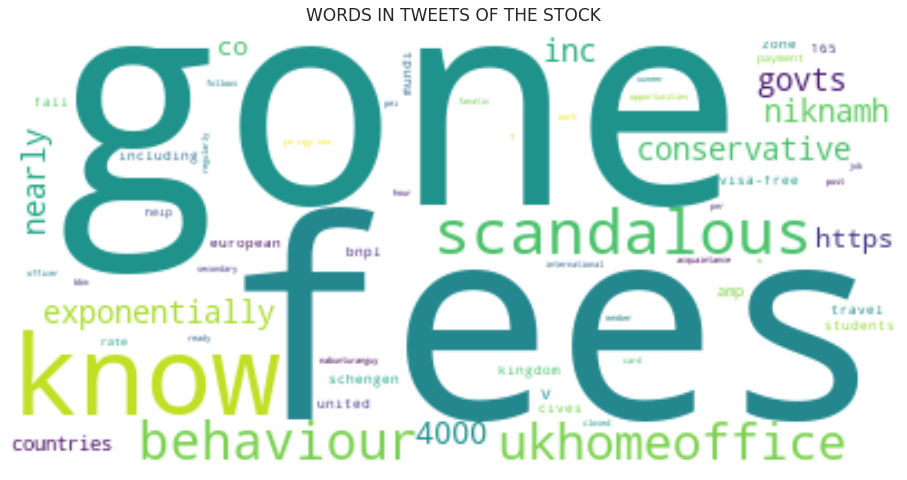

In [135]:
#Pass to list
data = tweets['tweet'].to_list()
#identify paaterns and create tokens
pattern = r'''(?x)                  # Flag to initiate verbose mode
              (?:[A-Z]\.)+          # get abreviations like U.S.A.
              | \w+(?:-\w+)*        # words with internal -
              | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
              | \.\.\.              # gets ...
              | [][.,;"'?():-_`]    # gets punctuation marks
'''
text = []
for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  text.append(token_2)
flatten = [w for l in text for w in l]
punctuation = list(string.punctuation)
df_2 = [w for w in flatten if w not in stop_words_n]
df_3 = [w for w in df_2 if w not in punctuation]
freq_words = nltk.FreqDist(df_3)
omit_words = ["rt","visa","stock", "stocks", "..."]
df_4 =  [w for w in df_3 if w not in omit_words]
freq_words = nltk.FreqDist(df_4)
print(freq_words.most_common(15))
plt.rcParams['figure.figsize'] = (16,9)
wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WORDS IN TWEETS OF THE STOCK',fontsize=17)
plt.show()

#Guidelines

1. Getting the data from the Bloomberg terminal – with long history
2. Calculating additional features: many technical indicators such as RSI, MACD, moving average etc.
3. Calculating the signals based on each of the indicators
Example: RSI between 30 – 70 nothing; below 30 buy, above 70 sell
https://www.investopedia.com/terms/r/rsi.asp
https://cointelegraph.com/news/here-s-3-ways-the-relative-strength-index-rsi-can-be-used-as-a-sell-signal
4. Later probably applying some feature selection methods here – Boruta, …
5. Calculate the BINARY target variable sell or buy e.g. based on the 1st differences day by day
6. Based on all of these signals train a classifier
7. Improve classification by parameter adjustments e.g. the boundaries 30 and 70

8. convert data to data series
www.alpharithms.com/relative-strength-index-rsi-in-python-470209/
10. Calculate technical indicators such as RSI
www.alpharithms.com/relative-strength-index-rsi-in-python-470209/







# Master functions

In [110]:
def stock_get_info(stock):
  symbol = yf.Ticker(stock)
  #Basic info
  longName = symbol.info["longName"]
  symb = symbol.info["symbol"]
  market = symbol.info["market"]
  sector = symbol.info["sector"]
  industry= symbol.info["industry"]
  longBusinessSummary = symbol.info["longBusinessSummary"]
  currency = symbol.info["currency"]
  currentPrice = symbol.info["currentPrice"]
  print(f"Name: {longName} Symbol: {symb} Market: {market}")
  print(f"Sector: {sector} Industry: {industry}\n\nBusiness description:")
  wrapper = textwrap.TextWrapper(width=80)
  word_list = wrapper.wrap(text=longBusinessSummary)  
  for element in word_list:
      print(element)
  print(f"\nCurrent price: {currentPrice} Currency: {currency}")

In [138]:
def stock_plot_hists(stock):
  symbol = yf.Ticker(stock)
  hist = symbol.history(period="max")
  # Let's see a historical view of the closing price
  plt.rcParams['figure.figsize'] = (16,9)
  plt.subplot(2, 1, 1)
  hist['Close'].plot(legend=True)
  plt.title('Price History from YFinance API',fontsize=17)
  plt.ylabel('Price', fontsize=15)
  plt.xlabel('Date', fontsize=15)
  # Now let's plot the total volume of stock being traded each day
  plt.subplot(2, 1, 2)
  hist['Volume'].plot(legend=True)
  plt.title('Volume of Sales History from YFinance API',fontsize=17)
  plt.ylabel('Volume', fontsize=15)
  plt.xlabel('Date', fontsize=15)

In [142]:
def stock_news_headers_word_cloud(stock):
  symbol = yf.Ticker(stock)
  # Create dataframe with news info
  col_names = ['link', 'providerPublishTime', 'title', 'type','uuid']
  news_df = pd.DataFrame(columns=col_names)
  counter = 0
  for news in symbol.news:
    link = news["link"]
    providerPublishTime = news["providerPublishTime"]
    title = news["title"]
    ntype = news["type"]
    uuid = news["uuid"]
  # Assemble all data in a list
    res = [link, providerPublishTime, title, ntype, uuid]  
    # Append the result to the CSV file
    counter += 1
    df_length = len(news_df)
    news_df.loc[df_length] = res
  # Print the number of tweets for this iteration
  print("# of news added: ", counter)
  news_df['providerPublishTime'] = news_df['providerPublishTime'].apply(datetime.fromtimestamp)
  #Pass to list
  data = news_df['title'].to_list()
  #identify paaterns and create tokens
  pattern = r'''(?x)                  # Flag to initiate verbose mode
                (?:[A-Z]\.)+          # get abreviations like U.S.A.
                | \w+(?:-\w+)*        # words with internal -
                | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
                | \.\.\.              # gets ...
                | [][.,;"'?():-_`]    # gets punctuation marks
  '''
  text = []
  for x in range(0, len(data)):
    token_1 = data[x].lower()
    token_2 = nltk.regexp_tokenize(token_1, pattern)
    text.append(token_2)
  flatten = [w for l in text for w in l]
  punctuation = list(string.punctuation)
  df_2 = [w for w in flatten if w not in stop_words_n]
  df_3 = [w for w in df_2 if w not in punctuation]
  freq_words = nltk.FreqDist(df_3)
  omit_words = ["stock", "stocks"]
  df_4 =  [w for w in df_3 if w not in omit_words]
  freq_words = nltk.FreqDist(df_4)
  plt.rcParams['figure.figsize'] = (16,9)
  wordcloud = WordCloud(background_color='white', collocations=False,
                        max_words=100).fit_words(freq_words)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('HEADLINES OF RECENT NEWS ON THE STOCK',fontsize=17)
  plt.show()

In [160]:
#some API FUNCTIONS and parameters
def auth():
    return os.getenv('TOKEN')
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers
def create_url(keyword, start_date, end_date, max_results = 10):  
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint you want to collect data from
    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()
def append_to_csv(json_response):
    #A counter variable
    counter = 0
    #Create dataframe
    col_names = ['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet']
    tweets_df = pd.DataFrame(columns=col_names)
    #Loop through each tweet
    for tweet in json_response['data']:     
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that
        # 1. Author ID
        author_id = tweet['author_id']
        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])
        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "
        # 4. Tweet ID
        tweet_id = tweet['id']
        # 5. Language
        lang = tweet['lang']
        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']
        # 7. source
        source = tweet['source']
        # 8. Tweet text
        text = tweet['text']  
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        # Append the result to the CSV file
        df_length = len(tweets_df)
        tweets_df.loc[df_length] = res
        counter += 1
    print("# of Tweets added from this response: ", counter)
    return tweets_df
def tweeter_request(stock, start_time, end_time, max_results):
  symbol = yf.Ticker(stock)
  name = symbol.info["shortName"]
  #Inputs for the request
  bearer_token = auth()
  headers = create_headers(bearer_token)
  keyword = f"{name} lang:en"
  url = create_url(keyword, start_time, end_time, max_results)
  json_response = connect_to_endpoint(url[0], headers, url[1])
  tweets = append_to_csv(json_response)
  return tweets
def tweets_word_cloud(tweets_df):
  #Pass to list
  data = tweets_df['tweet'].to_list()
  #identify paaterns and create tokens
  pattern = r'''(?x)                  # Flag to initiate verbose mode
                (?:[A-Z]\.)+          # get abreviations like U.S.A.
                | \w+(?:-\w+)*        # words with internal -
                | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
                | \.\.\.              # gets ...
                | [][.,;"'?():-_`]    # gets punctuation marks
  '''
  text = []
  for x in range(0, len(data)):
    token_1 = data[x].lower()
    token_2 = nltk.regexp_tokenize(token_1, pattern)
    text.append(token_2)
  flatten = [w for l in text for w in l]
  punctuation = list(string.punctuation)
  punctuation.append('https')
  punctuation.append('co')
  punctuation.append('t')
  df_2 = [w for w in flatten if w not in stop_words_n]
  df_3 = [w for w in df_2 if w not in punctuation]
  freq_words = nltk.FreqDist(df_3)
  omit_words = ["rt","visa","stock", "stocks", "..."]
  df_4 =  [w for w in df_3 if w not in omit_words]
  freq_words = nltk.FreqDist(df_4)
  print(freq_words.most_common(15))
  plt.rcParams['figure.figsize'] = (16,9)
  wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('WORDS IN TWEETS OF THE STOCK',fontsize=17)
  plt.show()

# Evaluate
Evaluate several aspects of a given stock and create a detailed report to support the daily decision to buy or not a stock

In [154]:
stock = "TSLA"
stock_get_info(stock)

Name: Tesla, Inc. Symbol: TSLA Market: us_market
Sector: Consumer Cyclical Industry: Auto Manufacturers

Business description:
Tesla, Inc. designs, develops, manufactures, leases, and sells electric
vehicles, and energy generation and storage systems in the United States, China,
and internationally. The company operates in two segments, Automotive, and
Energy Generation and Storage. The Automotive segment offers electric vehicles,
as well as sells automotive regulatory credits. It provides sedans and sport
utility vehicles through direct and used vehicle sales, a network of Tesla
Superchargers, and in-app upgrades; and purchase financing and leasing services.
This segment is also involved in the provision of non-warranty after-sales
vehicle services, sale of used vehicles, retail merchandise, and vehicle
insurance, as well as sale of products to third party customers; services for
electric vehicles through its company-owned service locations, and Tesla mobile
service technicians; and v

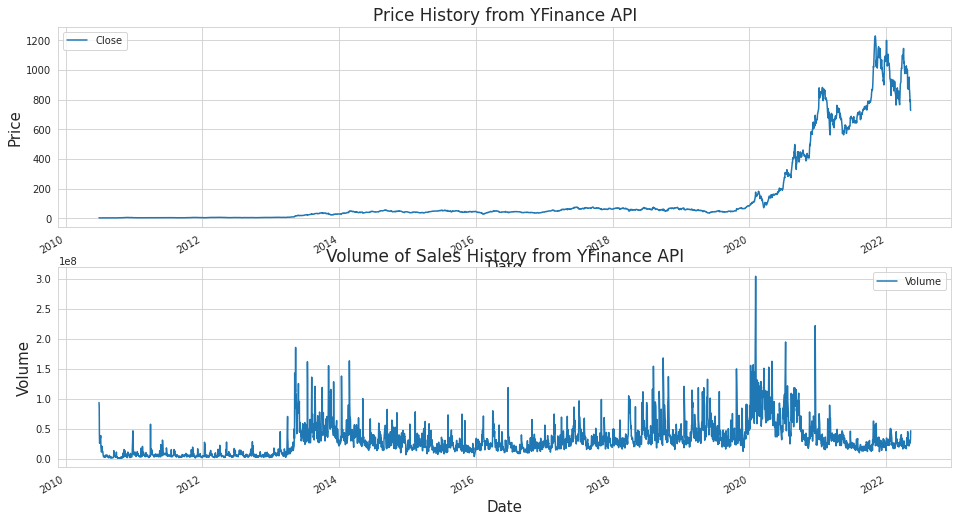

In [155]:
stock_plot_hists(stock)

# of news added:  8


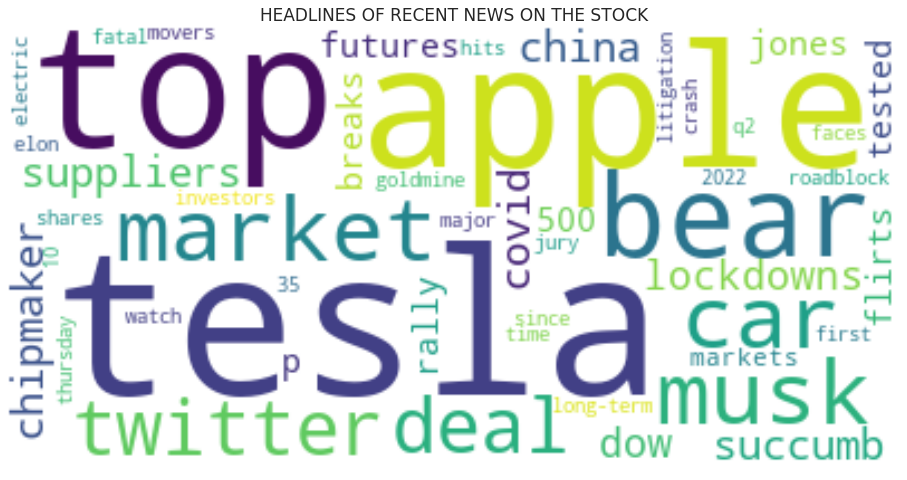

In [156]:
stock_news_headers_word_cloud(stock)

Endpoint Response Code: 200
# of Tweets added from this response:  100
[('inc', 113), ('tesla', 96), ('tsla', 44), ('twitter', 44), ('musk', 41), ('elon', 39), ('talks', 29), ('equity', 28), ('raise', 27), ('enough', 27), ('preferred', 27), ('financing', 26), ('proposed', 26), ('buyout', 26), ('market', 21)]


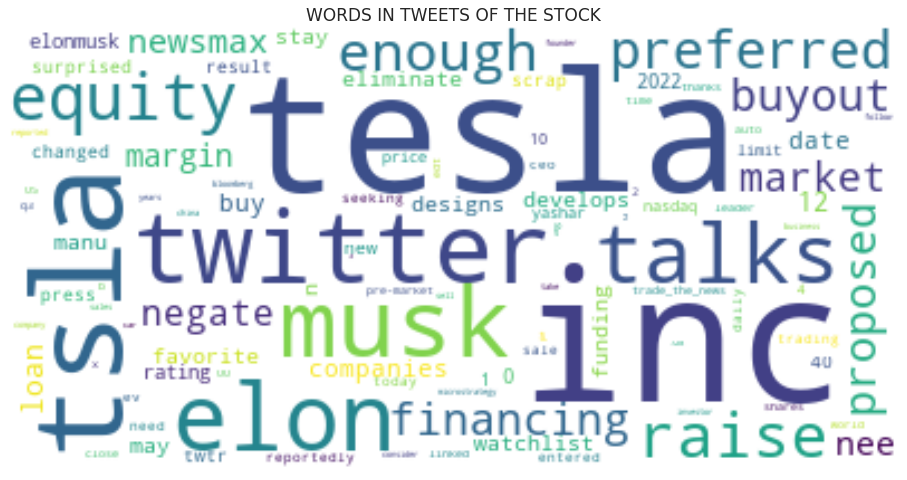

In [161]:
tweet_df = tweeter_request(stock, "2022-05-07T00:00:00.000Z", "2022-05-13T00:00:00.000Z", 100)
tweets_word_cloud(tweet_df)